#  **Predicting the Telecom Churn**

# <center> Data analysis 

### outline
1. [Demonstration of main Pandas methods](#1.-Demonstration-of-main-Pandas-methods)
2. [predicting telecom churn](#2.-First-attempt-at-predicting-telecom-churn)

### Questions

1. How much expensive the international calls are ?
2. what things lead to dissatisfaction among the telecom operator's customers ?
3. how customer service call relates to churn ?

## 1. Demonstration of main Pandas methods
Well... There are dozens of cool tutorials on Pandas and visual data analysis. If you are already familiar with these topics, you can wait for the 3rd article in the series, where we get into machine learning.  

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

We'll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [3]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` is less nicely formatted.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [4]:
print(df.shape)

(3333, 21)


From the output, we can see that the table contains 3333 rows and 20 columns.

Now let's try printing out column names using `columns`:

In [5]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe:

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let's apply this method to the `Churn` feature to convert it into `int64`:

In [8]:
df['churn'] = df['churn'].astype('int64')

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [9]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [10]:
df.describe(include=['object', 'bool'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,344-5967,no,no
freq,106,1,3010,2411


For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of `Churn`:

In [11]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

2850 users out of 3333 are *loyal*; their `Churn` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [12]:
df['churn'].value_counts(normalize=True)

0    0.86
1    0.14
Name: churn, dtype: float64


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):

In [14]:
df.sort_values(by='total day charge', ascending=False).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


We can also sort by multiple columns:

In [15]:
df.sort_values(by=['churn', 'total day charge'],
        ascending=[True, False]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**

In [16]:
df['churn'].mean()

0.14491449144914492

14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**What are average values of numerical features for churned users?**

In [18]:
df[df['churn'] == 1].mean()

account length            102.66
area code                 437.82
number vmail messages       5.12
total day minutes         206.91
total day calls           101.34
total day charge           35.18
total eve minutes         212.41
total eve calls           100.56
total eve charge           18.05
total night minutes       205.23
total night calls         100.40
total night charge          9.24
total intl minutes         10.70
total intl calls            4.16
total intl charge           2.89
customer service calls      2.23
churn                       1.00
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [19]:
df[df['churn'] == 1]['total day minutes'].mean()

206.91407867494814


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**

In [21]:
df[(df['churn'] == 0) & (df['international plan'] == 'no')]['total intl minutes'].max()

18.9

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

In [22]:
df.loc[0:5, 'state':'area code']

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [23]:
df.iloc[0:5, 0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [24]:
df[-1:]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**

In [25]:
df.apply(np.max)

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes          3.5e+02
total day calls                165
total day charge                60
total eve minutes          3.6e+02
total eve calls                170
total eve charge                31
total night minutes          4e+02
total night calls              175
total night charge              18
total intl minutes              20
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                            1
dtype: object

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with W, we can do it like this:

In [27]:
df[df['state'].apply(lambda state: state[0] == 'W')].head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [28]:
d = {'no' : False, 'yes' : True}
df['international plan'] = df['international plan'].map(d)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


The same thing can be done with the `replace` method:

In [29]:
df = df.replace({'voice mail plan': d})
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0



### Grouping

In general, grouping data in Pandas works as follows:


```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [30]:
columns_to_show = ['total day minutes', 'total eve minutes', 
                   'total night minutes']

df.groupby(['churn'])[columns_to_show].describe(percentiles=[])

total day minutes                                   total eve minutes  \
                  count    mean    std  min    50%    max             count   
churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [31]:
columns_to_show = ['total day minutes', 'total eve minutes', 
                   'total night minutes']

df.groupby(['churn'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])

total day minutes                    total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             total night minutes                      
        amax                mean    std  amin   amax  
churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:

In [32]:
pd.crosstab(df['churn'], df['international plan'])

international plan,False,True
churn,,
0,2664,186
1,346,137


In [33]:
pd.crosstab(df['churn'], df['voice mail plan'], normalize=True)

voice mail plan,False,True
churn,,
0,0.60,0.25
1,0.12,0.02


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

In [34]:
df.pivot_table(['total day calls', 'total eve calls', 'total night calls'],
               ['area code'], aggfunc='mean')

,total day calls,total eve calls,total night calls
area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60



### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let's create the `total_calls` Series and paste it into the DataFrame:

In [35]:
total_calls = df['total day calls'] + df['total eve calls'] + \
              df['total night calls'] + df['total intl calls']
df.insert(loc=len(df.columns), column='total calls', value=total_calls) 
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


It is possible to add a column more easily without creating an intermediate Series instance:

In [36]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + \
                     df['total night charge'] + df['total intl charge']
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls,total charge
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [37]:
# get rid of just created columns
df.drop(['total charge', 'total calls'], axis=1, inplace=True) 
# and here’s how you can delete rows
df.drop([1, 2]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,True,False,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,False,True,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## 2. predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We'll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn` (however, visual analysis will be covered more thoroughly in the next article).

In [38]:
pd.crosstab(df['churn'], df['international plan'], margins=True)

international plan,False,True,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [39]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

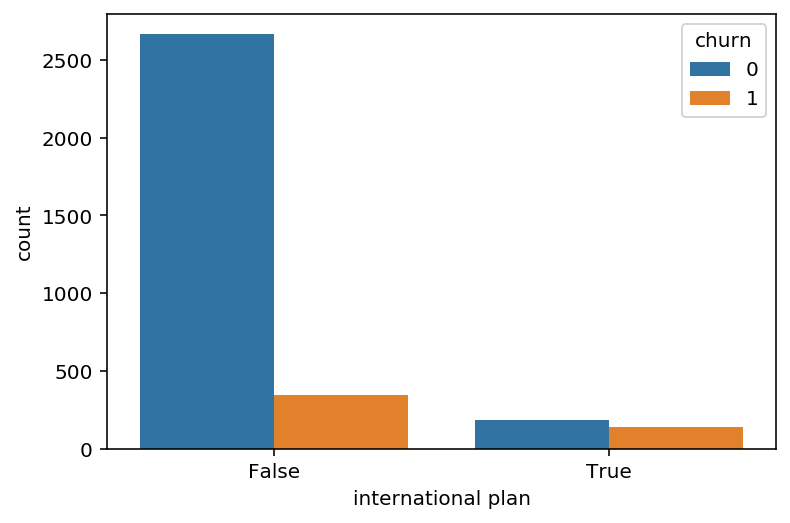

In [40]:
sns.countplot(x='international plan', hue='churn', data=df);


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – *Customer service calls*. Let's also make a summary table and a picture.

In [41]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


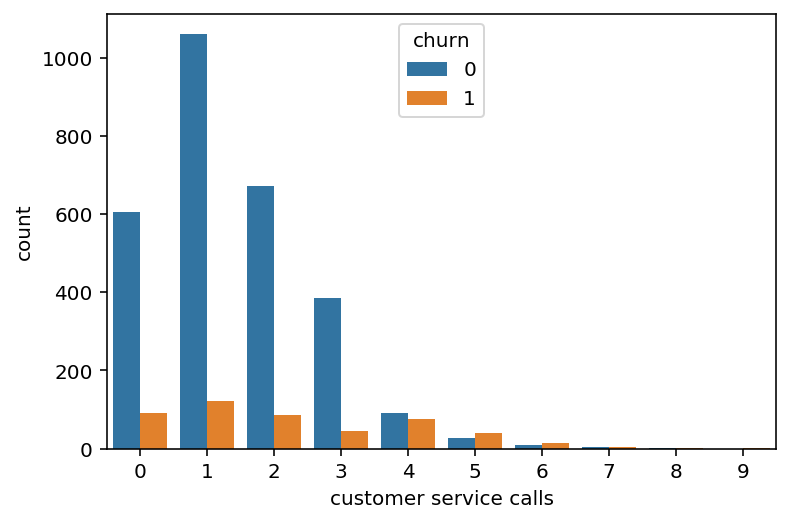

In [42]:
sns.countplot(x='customer service calls', hue='churn', data=df);

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn.

In [43]:
df['many_service_calls'] = (df['customer service calls'] > 3).astype('int')

pd.crosstab(df['many_service_calls'], df['churn'], margins=True)

churn,0,1,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


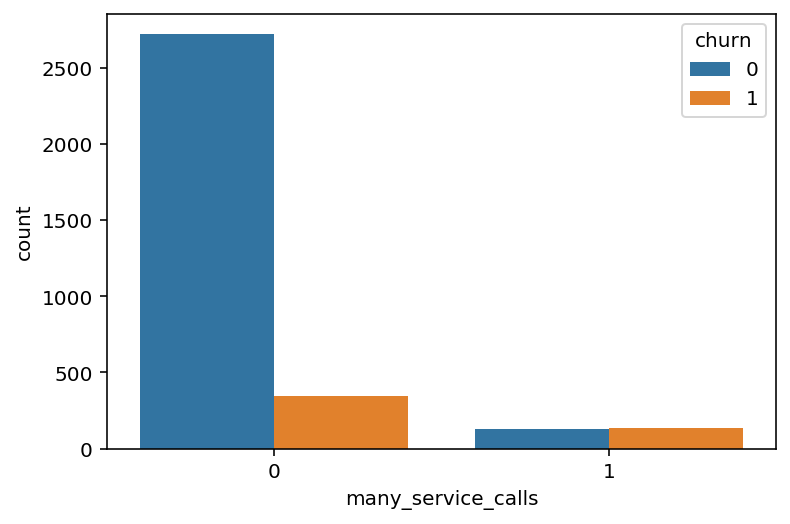

In [44]:
sns.countplot(x='many_service_calls', hue='churn', data=df);


Let's construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.

In [45]:
pd.crosstab(df['many_service_calls'] & df['international plan'] , df['churn'])

churn,0,1
row_0,,
False,2841,464
True,9,19
